## Binary Classification with a Bank Dataset

### Data loading & Initial Inspection
#### Create a copy of the trianing Dataset to work freely on it

In [1]:
import pandas as pd

train_data = pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")

explore = train_data.copy()

### Feature Description

* Id: A unique identifier for each client.
* Age: The age of the client.
* job: The type of occupation or job of the client.
* martial: The martial status of the client.
* education: The education level of the client
* default: Indicates whether the customer has credit in default.
* balance: The average yearly balance of the customer's account.
* housing: Indicates whether the customer has a housing loan.
* loan: Indicates whether the customer has a personal loan.
* contact: The type of communication used for the last contact.
* day: The day of the month of the last contact.
* month: The month of the year of the last contact.
* duration: The duration, in seconds, of the last contact.
* campaign: The number of contacts performed for this customer during the current campaign.
* pdays: The number of days that passed since the customer was last contacted from a previous campaign. A value of −1 typically means the customer was not previously contacted.
* previous: The number of contacts performed for this customer before the current campaign.
* poutcome: The outcome of the previous marketing campaign.
* y: The target variable indicating whether the customer subscribed to a term deposit based on probabilities.

### Let's begin our Exploratory Data Analysis (EDA) to understand the dataset's characteristics.

In [2]:
explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [3]:
explore.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [4]:
explore.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [5]:
explore.describe(include = object)

,job,marital,education,default,housing,loan,contact,month,poutcome
count,750000,750000,750000,750000,750000,750000,750000,750000,750000
unique,12,3,4,2,2,2,3,12,4
top,management,married,secondary,no,yes,no,cellular,may,unknown
freq,175541,480759,401683,737151,411288,645023,486655,228411,672450


In [6]:
print(sum(explore['previous'] == 0))
print(sum(explore["pdays"] == -1))

672431
672434


### Initial findings
* No missing values.
* The target value y is and enocded categorical feature, which make this a classification problem
* Due to the large number of sample __(750k sample)__ the possible model is _HistGradientBoostingClassifier_ & _SGDClassifier_
* For the predictors we have __7 numeric feature__ including ID feature and __10 categorical feature__
* The __`day`__ feature is a nominal categorical feature that should be converted using one-hot encoding, As  the numerical values (1-31) don't have a meaningful, linear order or relationship.
* The `previous`, `pdays` and `poutcome` features contain a large number of values that signify an absence of value...
   * To address this, we can create a new binary feature for each column to indicate the presence or absence of a previous contact.
   * We can improve the preditive power of the model by performing feature engineering on these 2 columns.

### Continued Data Exploration
* We will perform a deeper dive into the dataset's characteristics and relationships between the catgroical target and the numeric predictors with...
    * Correlation Analysis.  
    * Boxplot Visualization.
    * The numeric continuous distribution using histogram.

<Axes: >

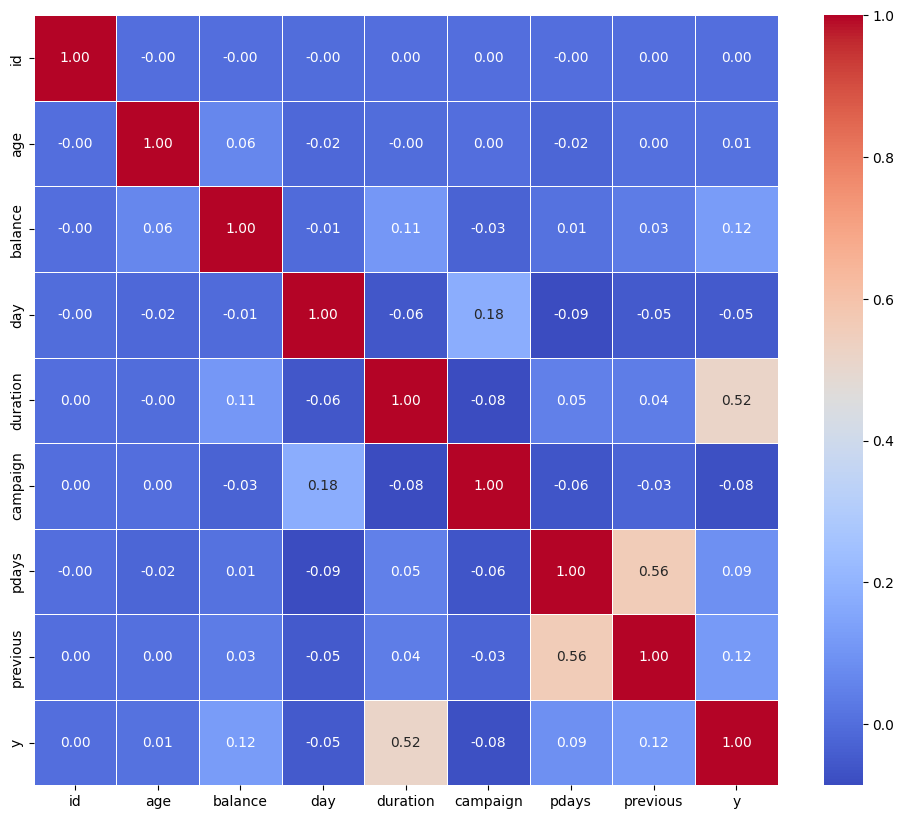

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

corr_columns = explore.select_dtypes(include = [np.number]).columns.tolist()
corr_matrix = explore[corr_columns].corr()

plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix, 
            annot = True,
            cmap = 'coolwarm',
            fmt = '.2f',
            linewidths = .5)

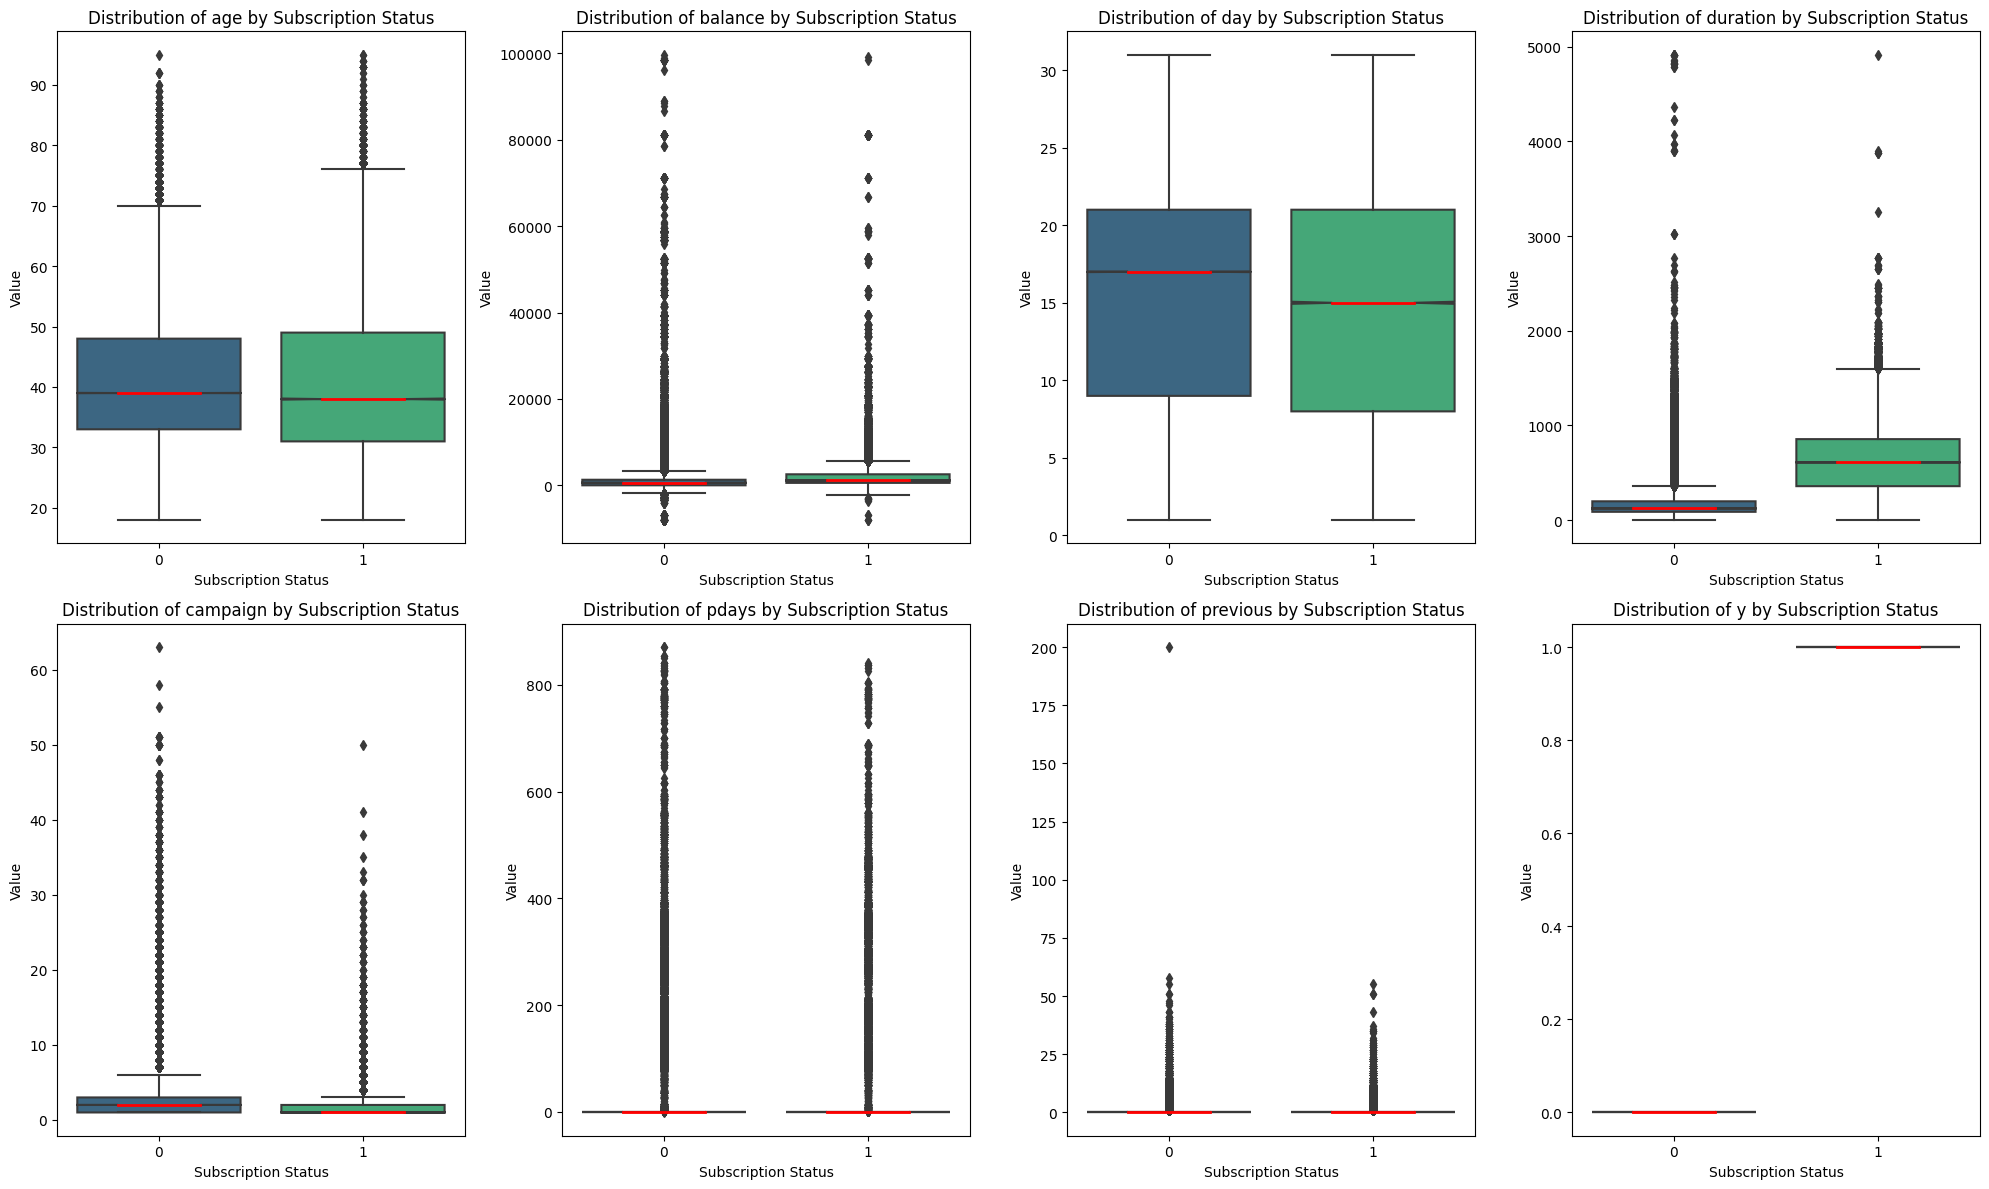

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20,12), layout = 'tight')
axes = axes.flatten()

if 'id' in corr_columns:
    corr_columns.remove('id')
    
palette = sns.color_palette("viridis", 2)

for i, col in enumerate(corr_columns):

    ax = axes[i]
    sns.boxplot(x = explore['y'], 
                y = explore[col], 
                ax = ax,
                palette=palette,
                notch=True,
                medianprops={'color': 'red', 'lw': 2})
    ax.set_xlabel('Subscription Status')
    ax.set_ylabel('Value')
    ax.set_title(f'Distribution of {col} by Subscription Status', fontsize=12)

for i in range(len(corr_columns), len(axes)):
    axes[i].axis('off')

plt.show()

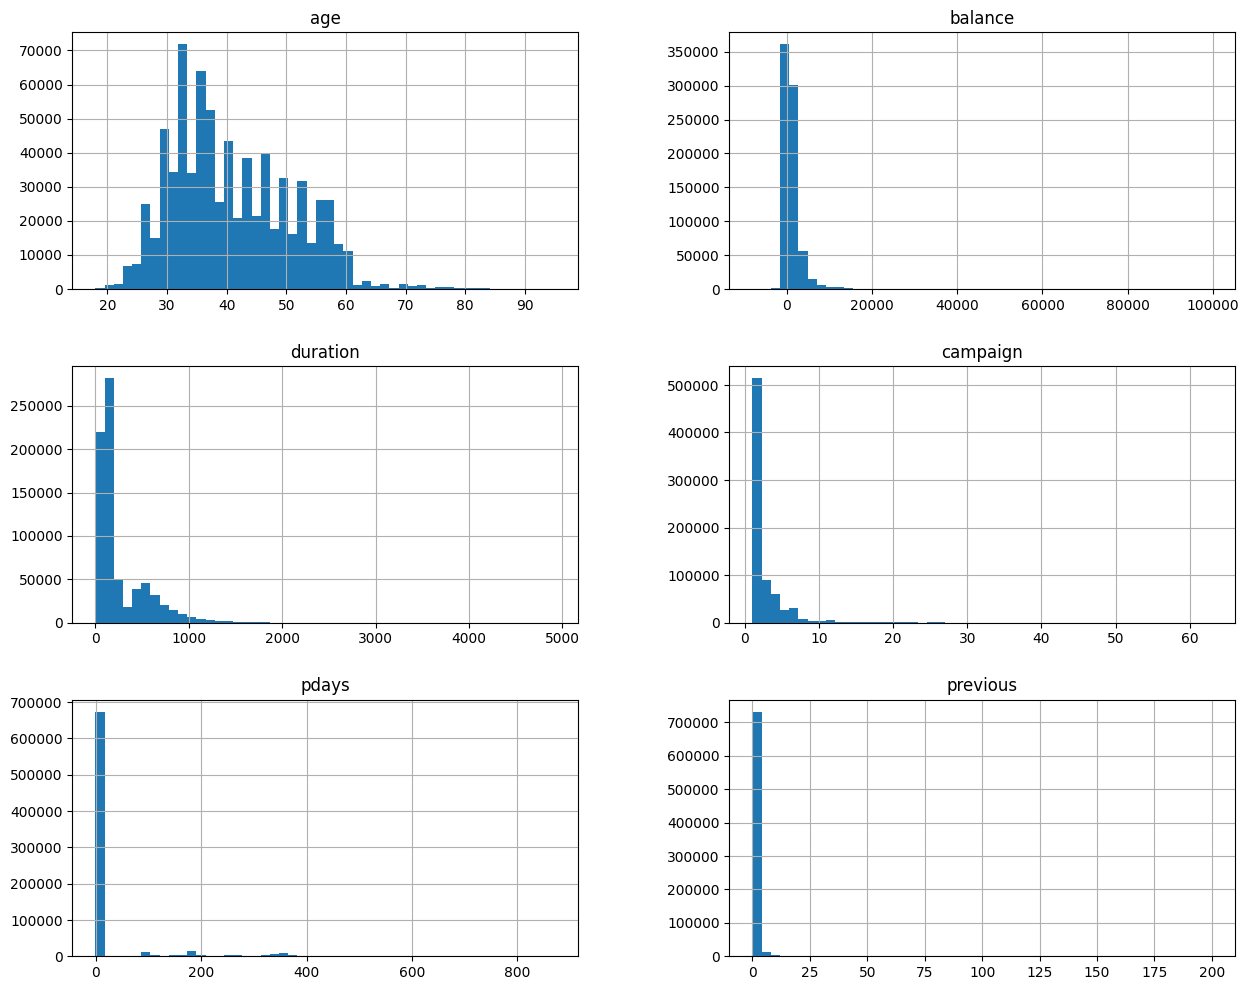

In [9]:
continuous_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

explore[continuous_columns].hist(bins = 50, figsize = (15,12));

### Additional Findings
* feature `duration`...
    * The boxplot and the correlation matrix both indicate that the duration of the last contact is highly influential predictor. The median duration for successful outcome is higher than for unsuccessful one.
    * __Action:__ needs log transformation due to high skewness.
* feature `balance`...
    * less correlated that duration and the boxplot shows that it is a weak predictor.
    * __Action:__ needs log transoformation as `duration`.
* featuer `age`...
    * very low correlation and a weak predictor from the boxplot.
    * __Action:__ possible feature engineering by creating age bins to capture its relationship with the target
* features `previous`, `pdays`, `poutcome`...
    * __Action:__ confirmed they need a binary classification for absence/presence due to the large numbers of outliers in the box plot
* The two features `pdays`, `previous` has a high collinearity.
    * __Action__ exploring possible combination or drop one of them.

### Continued Data Exploration
* we will dive deeper into the dataset's characteristics and relationship between the categorical predictors and the categorical target using...
    * the __Chi-Squared Test__ for correlation.
    * __Cross Tabulation__ for visualization. 

In [10]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):

    contingency_table = pd.crosstab(x, y)
    
    if contingency_table.empty or contingency_table.min().min() == 0:
        return 0, 1.0

    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    
    min_dim = min(r - 1, k - 1)
    if min_dim == 0:
        return 0, 1.0
    
    v = np.sqrt(phi2 / min_dim)
    
    return v, p_value

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 
                        'loan', 'contact', 'month', 'poutcome', 'y']

results_list = []

for feature1 in categorical_features:
    for feature2 in categorical_features:
        
        v, p = cramers_v(explore[feature1], explore[feature2])
        
        results_list.append({'Feature1': feature1, 'Feature2': feature2, 'Cramers_V': v, 'P_Value': p})


cramers_v_results = pd.DataFrame(results_list)

cramers_v_results = cramers_v_results.sort_values(by='Cramers_V', ascending=False)

pd.set_option('display.float_format', '{:.6f}'.format)
print("Cramer's V and P-value for Categorical Features vs. Target 'y':")
print(cramers_v_results[cramers_v_results['Feature1'] == 'y'])

Cramer's V and P-value for Categorical Features vs. Target 'y':
   Feature1   Feature2  Cramers_V  P_Value
98        y   poutcome   0.308990 0.000000
97        y      month   0.264025 0.000000
96        y    contact   0.159913 0.000000
90        y        job   0.157306 0.000000
94        y    housing   0.153585 0.000000
91        y    marital   0.090998 0.000000
92        y  education   0.089501 0.000000
95        y       loan   0.081633 0.000000
93        y    default   0.030118 0.000000
99        y          y   0.000000 1.000000


<Axes: xlabel='Feature2', ylabel='Feature1'>

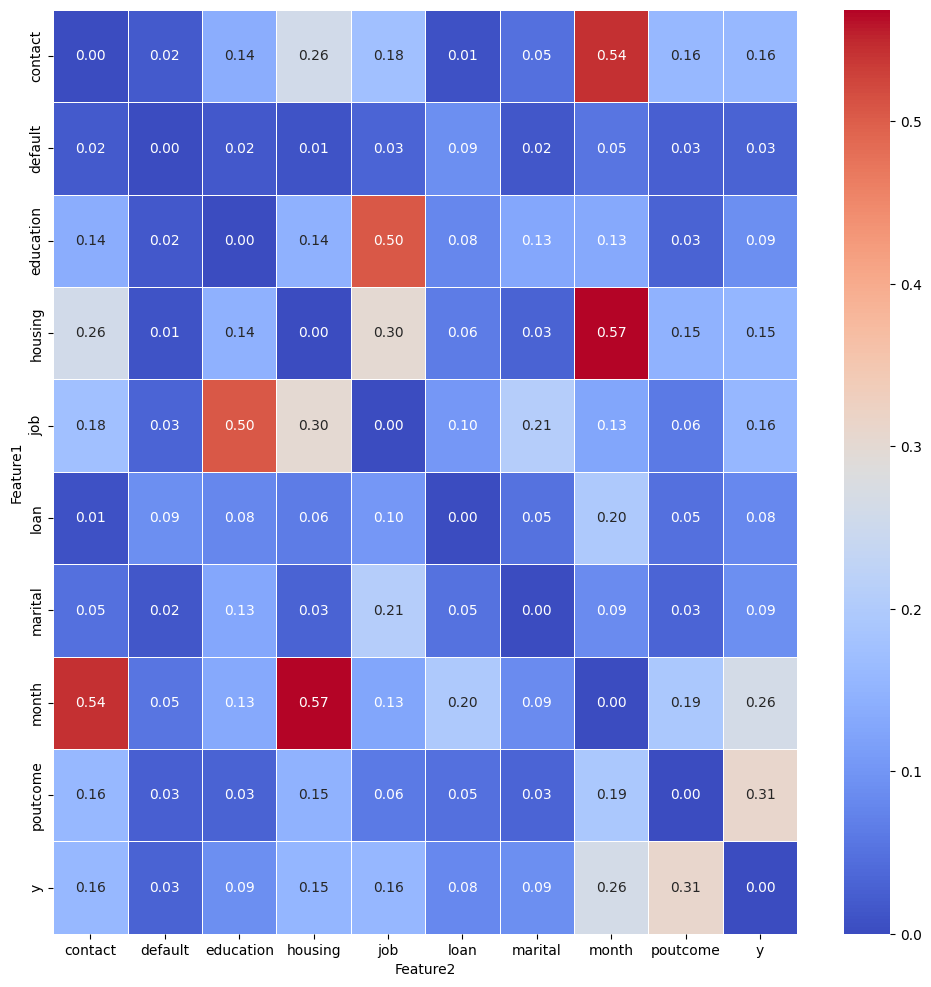

In [11]:
cramers_v_matrix = cramers_v_results.pivot(index='Feature1', 
                                         columns='Feature2', 
                                         values='Cramers_V')

plt.figure(figsize = (12,12))
sns.heatmap(cramers_v_matrix, 
            annot = True,
            cmap = 'coolwarm',
            fmt = '.2f',
            linewidths = .5)

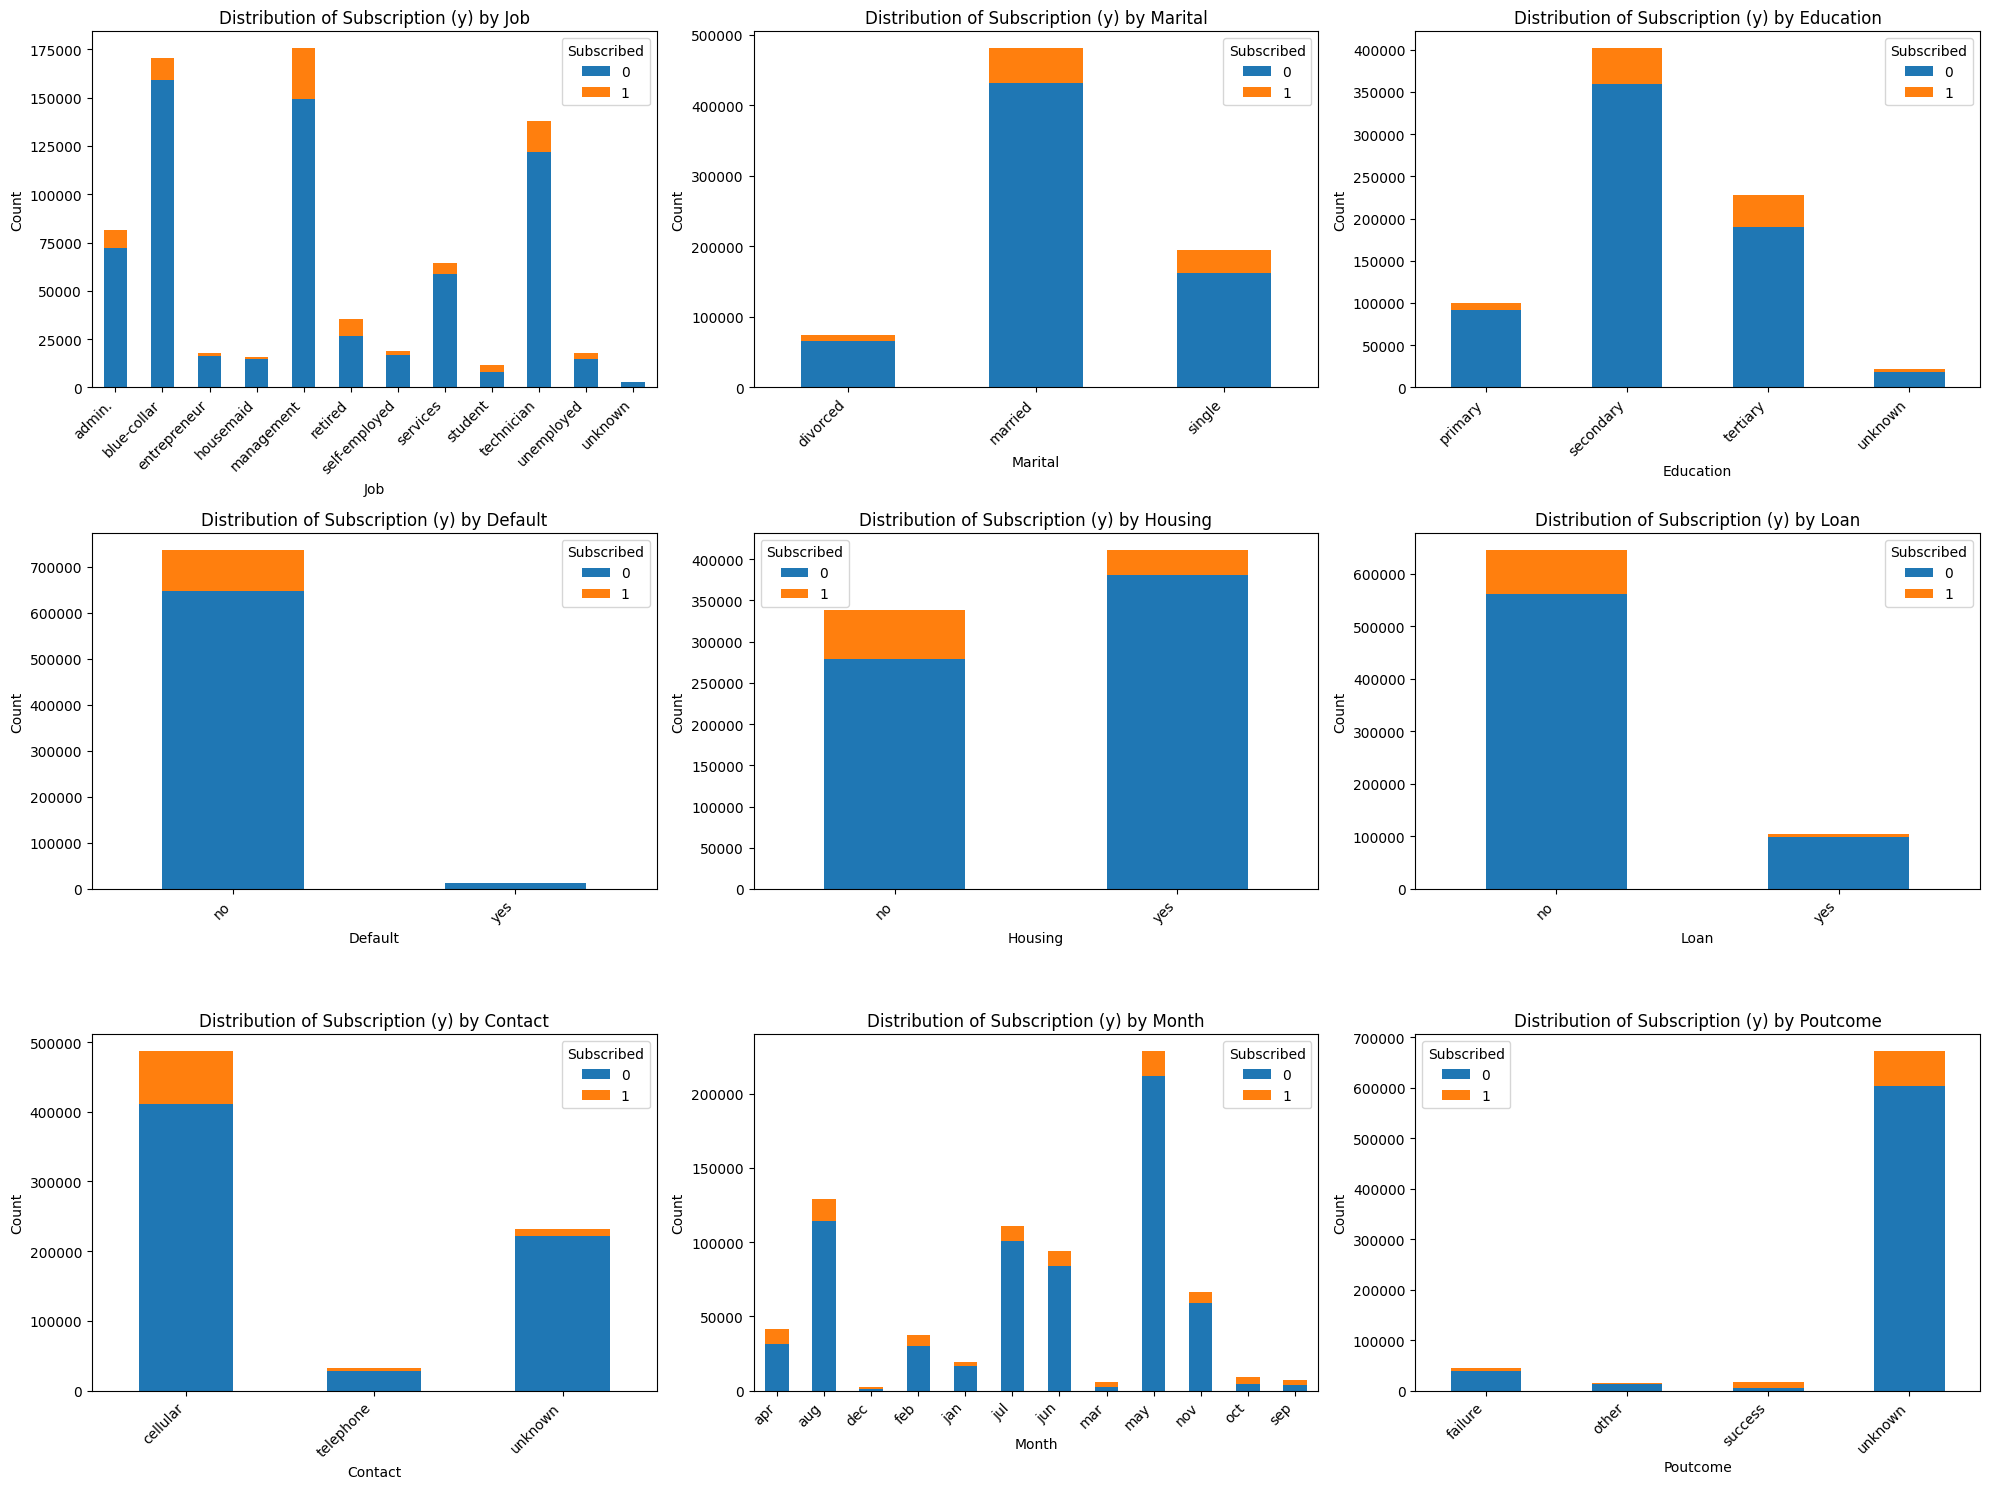

In [12]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 
                        'loan', 'contact', 'month', 'poutcome']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,15))
axes = axes.flatten()

for i, col in enumerate (categorical_features):

    ax = axes[i]
    col_vs_target = pd.crosstab(explore[col], explore['y'])
    col_vs_target.plot(kind='bar', stacked=True, ax = ax)

    ax.set_title(f'Distribution of Subscription (y) by {col.capitalize()}')
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
    ax.legend(title='Subscribed')

plt.tight_layout() 
plt.show()


In [13]:
print('success predictive power', sum((explore['poutcome'] == 'success') & (explore['y'] == 1)) / sum(explore['poutcome'] == 'success'))
print('other predictive power', sum((explore['poutcome'] == 'other') & (explore['y'] == 1)) / sum(explore['poutcome'] == 'other'))
print('failure predictive power', sum((explore['poutcome'] == 'failure') & (explore['y'] == 1)) / sum(explore['poutcome'] == 'failure'))
print('unknown predictive power', sum((explore['poutcome'] == 'unknown') & (explore['y'] == 1)) / sum(explore['poutcome'] == 'unknown'))

success predictive power 0.7640042959697021
other predictive power 0.16684753119913184
failure predictive power 0.1327939709630943
unknown predictive power 0.10189753885047216


### Additional Findings
* Based on the Cramer's V score, The strongest categorical predictor are `poutcome`, `month`.
* Features __`education & job`__, __`housing & month`__, __`contact & month`__ have high collinearity..
    * We can address this issue by exploreing possible combination for these features.
* Features `month`, `job` need __Target Encoding__ due to their high cardinality.
* Feature `poutcome` binray classifiation will be on success value by making it 1 as its predictive power is the highest, and the other = 0 due to their less predictive power
* The rest of the feature needs one hot encoding.

### Let's begin our preprocessing & Building our model
* we will build a base model using only 2 feature that are duration and poutcome which both are the highest predictors that exist.
* We will make the binary classfication for the success in poutcome feature.

In [45]:
def binary_classification_for_poutcome(X):
    return (X == 'success').astype(int).to_numpy().reshape(-1,1)

def binary_classification_for_previous(X):
    return (X > 0).astype(int).to_numpy().reshape(-1,1)

def binary_classification_for_pdays(X):
    return (X > -1).astype(int).to_numpy().reshape(-1,1)

def log_pdays(X):
    X_safe = np.where(X == -1, 0, X)
    transformed_log = no.log1p(X_safe)
    transformed_array = np.where(x == -1, 0, transformed_log)
    return transformed_array.reshape(-1,1)

In [15]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

X = explore.drop(['y'], axis = 1)
y = explore['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =23)

pout_pipe = make_pipeline((FunctionTransformer(binary_classification_for_poutcome)))

preprocessing = ColumnTransformer([
    ('binary_poutcome', pout_pipe, ['poutcome']),
    ('duration_', 'passthrough', ['duration']),
], remainder = 'drop')

X_eng = preprocessing.fit_transform(X_train)

hist_clf = HistGradientBoostingClassifier(max_depth = 10, max_iter = 1000, random_state = 23)

cross_val_score(hist_clf, X_eng, y_train, cv = 5, scoring = 'roc_auc')

array([0.92026764, 0.92060408, 0.91752115, 0.91943638, 0.91984612])

In [16]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(random_state = 23)
cross_val_score(dummy_clf, X_eng, y_train, cv = 5, scoring = 'roc_auc')

array([0.5, 0.5, 0.5, 0.5, 0.5])

* To ensure these results (0.92026764, 0.92060408, 0.91752115, 0.91943638, 0.91984612) are not a fluke, we performed a crucial sanity check against a Dummy Classifier, which simply predicts based on the most frequent class. The Dummy Classifier yielded an ROC AUC score of 0.50, confirming our model is performing significantly better than random guessing.

#### We will perform the paired t-test after adding some feature to make sure they are useful

In [24]:
from scipy import stats

base_model_scores = np.array([0.92026764, 0.92060408, 0.91752115, 0.91943638, 0.91984612])

In [43]:
from sklearn.preprocessing import OneHotEncoder

encoder_pipe = make_pipeline((OneHotEncoder(drop = 'first', handle_unknown='ignore', sparse_output=False)))

log_pipe = make_pipeline((FunctionTransformer(np.log1p)))

prev_binary_pipe = make_pipeline((FunctionTransformer(binary_classification_for_previous)))

pdays_binary_pipe = make_pipeline((FunctionTransformer(binary_classification_for_pdays)))
pdays_log_pipe = make_pipeline((FunctionTransformer(log_pdays)))                        

preprocessing = ColumnTransformer([
    ('binary_poutcome', pout_pipe, ['poutcome']),
    ('duration', 'passthrough', ['duration']),
    ('encoder', encoder_pipe, ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'day']),
    ('pdays_binary', pdays_binary_pipe, ['pdays']),
    ('pdays_log', pdays_log_pipe, ['pdays']),
    ('previous_binary', prev_binary_pipe, ['previous']),
    ('previous_log', log_pipe, ['previous'])
], remainder = 'drop')

X_eng = preprocessing.fit_transform(X_train)

/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)


In [44]:
new_model_scores = cross_val_score(hist_clf, X_eng, y_train, cv = 5, scoring = 'roc_auc')

t_statistic, p_value = stats.ttest_rel(new_model_scores, base_model_scores)

# Print the results
print(f"Base Model Mean Score: {np.mean(base_model_scores):.4f}")
print(f"New Model Mean Score: {np.mean(new_model_scores):.4f}")
print("-" * 30)
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

base_model_scores = new_model_scores

Base Model Mean Score: 0.9490
New Model Mean Score: 0.9509
------------------------------
T-statistic: 9.9087
P-value: 0.0006


### Fine tuning the hyperparameters

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, randint, uniform
from sklearn.metrics import roc_auc_score

param_distributions = {
    'learning_rate': loguniform(1e-3, 1e-1), # e.g., 0.001 to 0.
    'max_depth': randint(3, 16),
    'max_iter': randint(100, 1001), 
    'l2_regularization': uniform(0.0, 1.0),
    'min_samples_leaf': randint(5, 51)
}

histG_clf = HistGradientBoostingClassifier(random_state = 23)

random_search = RandomizedSearchCV(
    estimator = histG_clf,
    param_distributions = param_distributions,
    n_iter = 10,
    scoring = 'roc_auc',
    cv = 5,
    verbose = 2,
    random_state = 23,
    n_jobs = -1
)

print("Starting hyperparameter search...")
random_search.fit(X_eng, y_train)
print("Search complete.")

print("-" * 50)
print(f"Best ROC AUC Score found: {random_search.best_score_:.4f}")

Starting hyperparameter search...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Search complete.
--------------------------------------------------
Best ROC AUC Score found: 0.9514


### We will Create The submission for this result for kaggle

In [50]:
test_eng = preprocessing.transform(test_data)

best_hist_clf = random_search.best_estimator_ 

y_pred_proba = best_hist_clf.predict_proba(test_eng)[:, 1]

/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)


In [51]:
output = pd.DataFrame({'id': test_data['id'], 'y': y_pred_proba})

output.to_csv("submission.csv", index = False)

[CV] END l2_regularization=0.5172978838465893, learning_rate=0.07832947354227426, max_depth=9, max_iter=588, min_samples_leaf=36; total time= 1.0min
[CV] END l2_regularization=0.5172978838465893, learning_rate=0.07832947354227426, max_depth=9, max_iter=588, min_samples_leaf=36; total time= 1.3min
[CV] END l2_regularization=0.5739083828109902, learning_rate=0.0076529234408691076, max_depth=13, max_iter=765, min_samples_leaf=11; total time= 3.6min
[CV] END l2_regularization=0.21965262009242426, learning_rate=0.046417120607151655, max_depth=5, max_iter=559, min_samples_leaf=26; total time= 1.8min
[CV] END l2_regularization=0.8840321823721048, learning_rate=0.05887014110300643, max_depth=3, max_iter=397, min_samples_leaf=20; total time= 1.1min
[CV] END l2_regularization=0.8840321823721048, learning_rate=0.05887014110300643, max_depth=3, max_iter=397, min_samples_leaf=20; total time= 1.1min
[CV] END l2_regularization=0.4191212279977419, learning_rate=0.023073573532330797, max_depth=4, max_i